# Application - Anomaly Detection

Anomaly detection is another word for outlier detection. In other words, trying to identify the odd one out. 

Framing this into the context of a Guassian Mixture is simple: any instance that falls within a low density region is consider an anomaly (through some predefined threshold). Identifying this threshold is sometimes well known. For example, if you your produce is defective 4% of the time, then the density threshold (pdf) should be the value that identifies 4% of the instances. Or if card testing occurs .01% of all transactions, then it could be similiarly derived.

A precision-recall curve can also be derived here because we can have both false positives and false negatives depending on the threshold value.

## Demonstration

Suppose we wanted to identify 4% of the smallest, or lowest density groups. Here's how we could do that.

Text(0.5, 1.0, 'Gaussian Mixture Model Identified Anomalies')

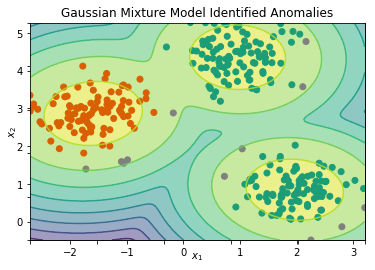

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from mltoolbox.draw.color import map_labels_to_random_color
from sklearn.datasets.samples_generator import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GaussianMixture
from mltoolbox.draw.classification import plot_2d_decision_boundary_unsupervised


X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=0, cluster_std=.5)
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies_bv = densities < density_threshold
anomalies = X[anomalies_bv]

colors = np.array(map_labels_to_random_color(y, cmap_name='Dark2', _override_n_colors=10))
colors[anomalies_bv] = [0.5e+00, 0.5e+00, 0.5e+00, 1.0e+00]
plot_2d_decision_boundary_unsupervised([gm], X, (min(X[:,0]), max(X[:,0])),
                                       (min(X[:,1]), max(X[:,1])), 100, 100,
                                       soft=True, color=colors)
plt.title('Gaussian Mixture Model Identified Anomalies')

The anomalies are identified in black.